<a href="https://colab.research.google.com/github/Rahul-yadavgithub/Concepts-of-ML/blob/main/DescionTree_and_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy --quiet

In [ ]:
!pip install pandas --quiet

In [ ]:
!pip install opendatasets --quiet

In [ ]:
!pip install scikit-learn --quiet

In [ ]:
import opendatasets as od

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib

In [ ]:
import os

In [ ]:
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
pd.set_option('display.max_rows', 150)

In [ ]:
sns.set_style('darkgrid')

In [ ]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


100%|██████████| 3.83M/3.83M [00:00<00:00, 240MB/s]

In [ ]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

In [ ]:
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [ ]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
raw_df.dropna(subset =['RainTomorrow'], inplace= True)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

<Axes: title={'center': 'No of Rows in the year'}, xlabel='Date', ylabel='count'>

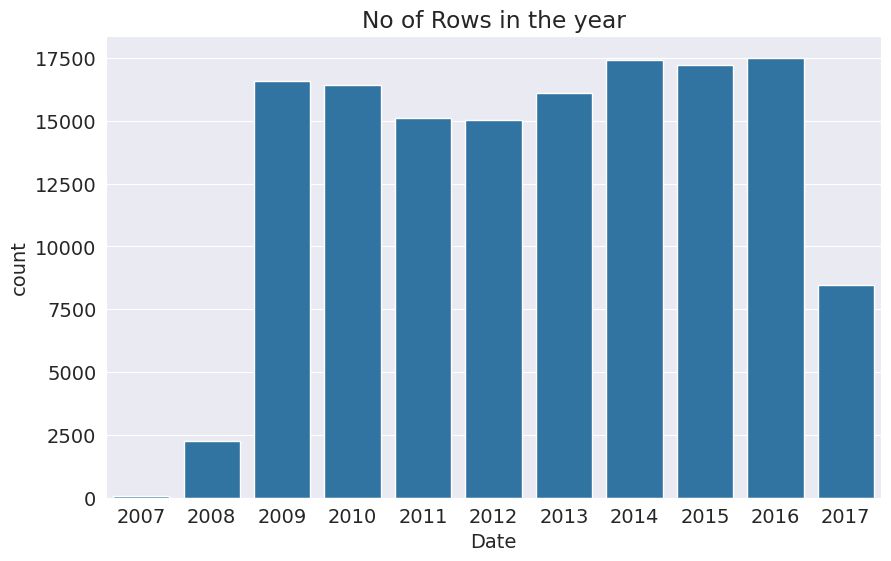

In [ ]:
plt.title('No of Rows in the year')
sns.countplot(x = pd.to_datetime(raw_df.Date).dt.year)

In [ ]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df   = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape   :', val_df.shape)
print('test_df.shape  :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape   : (17231, 23)
test_df.shape  : (25974, 23)


In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_cols = 'RainTomorrow'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [ ]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'mean')

In [ ]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [ ]:
train_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,-8.5,-4.1,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.5,979.0,0.0,0.0,-5.9,-5.1
max,33.9,48.1,371.0,82.4,14.3,135.0,87.0,87.0,100.0,100.0,1041.0,1039.6,9.0,9.0,40.2,46.1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.0,0.013233,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0304,0.0,0.0,0.027426,0.005758
max,1.0,1.000000,1.0,0.568276,0.986207,1.0,0.669231,1.0,1.0,1.0,1.0,1.0000,1.0,1.0,1.000000,0.988484


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
?OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

In [ ]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/tmp/ipython-input-48-1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipython-input-48-1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipython-input-48-1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all

In [ ]:
# for Checking the version of all

!pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
accelerate                            1.8.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.1
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           25.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.1.0
astropy-iers-data                     0.2025.7.7.0.39

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
?DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state = 45)

In [ ]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=45)

In [ ]:
val_preds = model.predict(X_val)

In [ ]:
val_preds

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [ ]:
val_targets

,RainTomorrow
2133,No
2134,No
2135,No
2136,No
2137,No
...,...
144913,No
144914,No
144915,No
144916,No


In [ ]:
pd.value_counts(val_preds)

/tmp/ipython-input-59-4192277009.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(val_preds)


,count
No,13507
Yes,3724


In [ ]:
pd.value_counts(val_targets)

/tmp/ipython-input-60-1785109786.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(val_targets)


,count
RainTomorrow,
No,13583
Yes,3648


In [ ]:
train_preds = model.predict(X_train)

In [ ]:
pd.value_counts(train_preds)

/tmp/ipython-input-62-1258350197.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


,count
No,76707
Yes,22281


In [ ]:
pd.value_counts(train_targets)

/tmp/ipython-input-63-2026127828.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_targets)


,count
RainTomorrow,
No,76705
Yes,22283


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(train_preds, train_targets)

0.9999797955307714

In [ ]:
accuracy_score(val_preds, val_targets)

0.791654576054785

In [ ]:
train_probs = model.predict_proba(X_train)

In [ ]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
model.score(X_val, val_targets)

0.791654576054785

In [ ]:
model.score(X_test, test_targets)

0.7736967736967737

In [ ]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]\nclass = No'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]\nclass = No'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ng

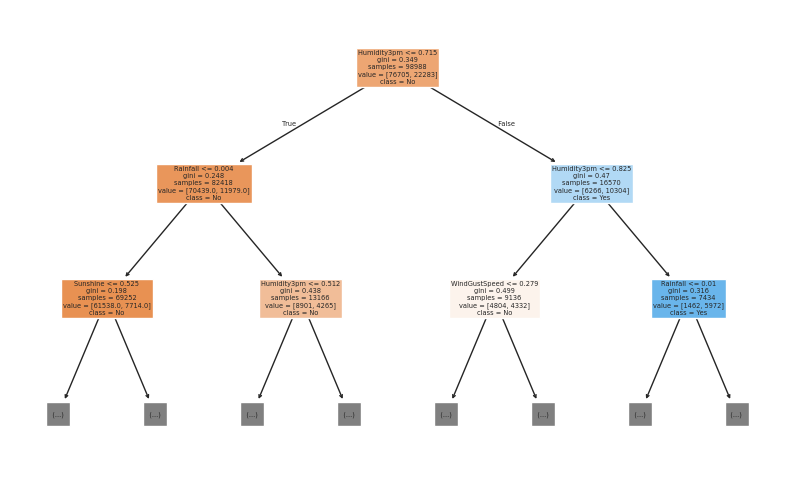

In [ ]:
plot_tree(model, filled=True, feature_names= X_train.columns, class_names = ['No', 'Yes'], max_depth = 2)

In [ ]:
model.tree_.max_depth

48

In [ ]:
tree_text = export_text(model, max_depth = 7,feature_names= list(X_train.columns))

print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |--- Location_Watsonia >  0.50
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- WindDir9am_NE >  0.50
|   |   |   |   |   |   |   |--- WindGustSpeed <= 0.25
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |--- WindGustSpeed >  0.25
|   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- WindGustSpeed <= 0.25
|   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   | 

In [ ]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No',
       'RainToday_Yes', 'RainToday_nan'],
      dtype='object', length=119)

In [ ]:
# Assinging the Importance of each column
model.feature_importances_

array([3.58912032e-02, 3.24748793e-02, 5.73059140e-02, 2.38903941e-02,
       4.98636422e-02, 5.52835498e-02, 2.75925663e-02, 2.96775105e-02,
       3.95720551e-02, 2.62053647e-01, 3.54752688e-02, 6.19253768e-02,
       1.36990291e-02, 1.78696102e-02, 3.37799965e-02, 3.12261830e-02,
       2.14648553e-03, 2.08526515e-03, 1.38348614e-03, 5.74954070e-04,
       1.67181191e-03, 9.80422124e-04, 7.37564583e-04, 1.78235209e-03,
       1.01697063e-03, 1.48737429e-03, 6.72435830e-04, 2.28639965e-03,
       1.50818977e-03, 1.69155025e-04, 1.05695365e-03, 1.49624249e-03,
       3.81128848e-04, 8.07934325e-04, 1.58480608e-03, 7.93567033e-04,
       1.02648993e-03, 9.56565029e-04, 1.66804413e-03, 1.96199765e-03,
       2.48878684e-04, 7.54166184e-04, 1.69314603e-03, 1.43393376e-03,
       1.38337791e-03, 9.30642299e-04, 6.70837601e-04, 1.65154379e-03,
       1.27738716e-03, 1.97381413e-03, 7.64056724e-04, 1.79857636e-03,
       9.33806920e-04, 1.25624819e-03, 1.48787813e-03, 4.32214066e-04,
      

In [ ]:
importance_df = pd.DataFrame({
    'Feature' : X_train.columns,
    'Importance' : model.feature_importances_
}).sort_values('Importance', ascending = False)

In [ ]:
importance_df.head(10)

,Feature,Importance
9,Humidity3pm,0.262054
11,Pressure3pm,0.061925
2,Rainfall,0.057306
5,WindGustSpeed,0.055284
4,Sunshine,0.049864
8,Humidity9am,0.039572
0,MinTemp,0.035891
10,Pressure9am,0.035475
14,Temp9am,0.033780
1,MaxTemp,0.032475


<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Feature'>

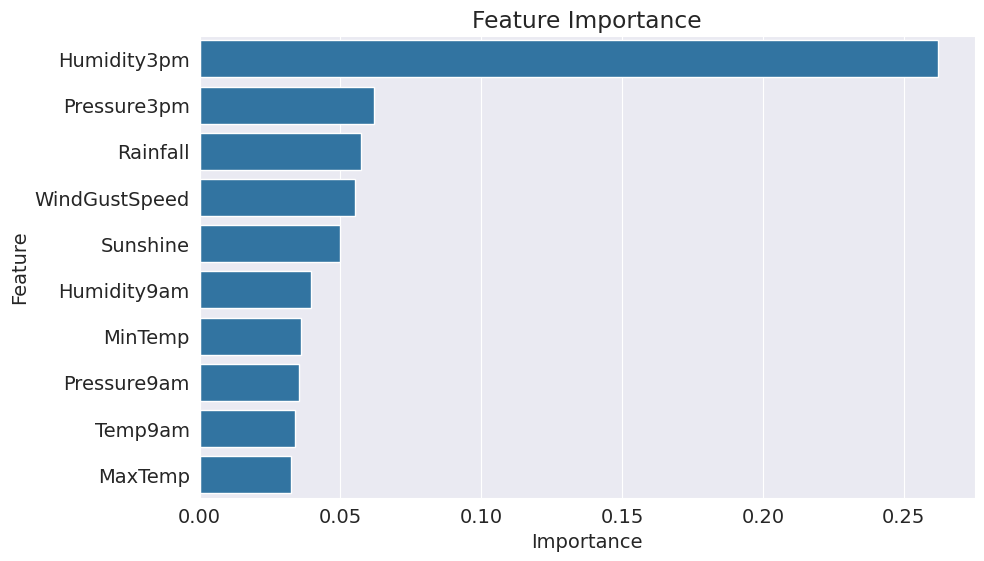

In [ ]:
plt.title('Feature Importance')
sns.barplot(x = 'Importance', y = 'Feature', data = importance_df.head(10))

In [ ]:
model = DecisionTreeClassifier(max_depth = 3, random_state = 45)

In [ ]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=45)

In [ ]:
model.score(X_val, val_targets)

0.8334397307178921

In [ ]:
model.score(X_test, test_targets)

0.8235928235928236

In [ ]:
model.score(X_train, train_targets)

0.8291308037337859

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSp

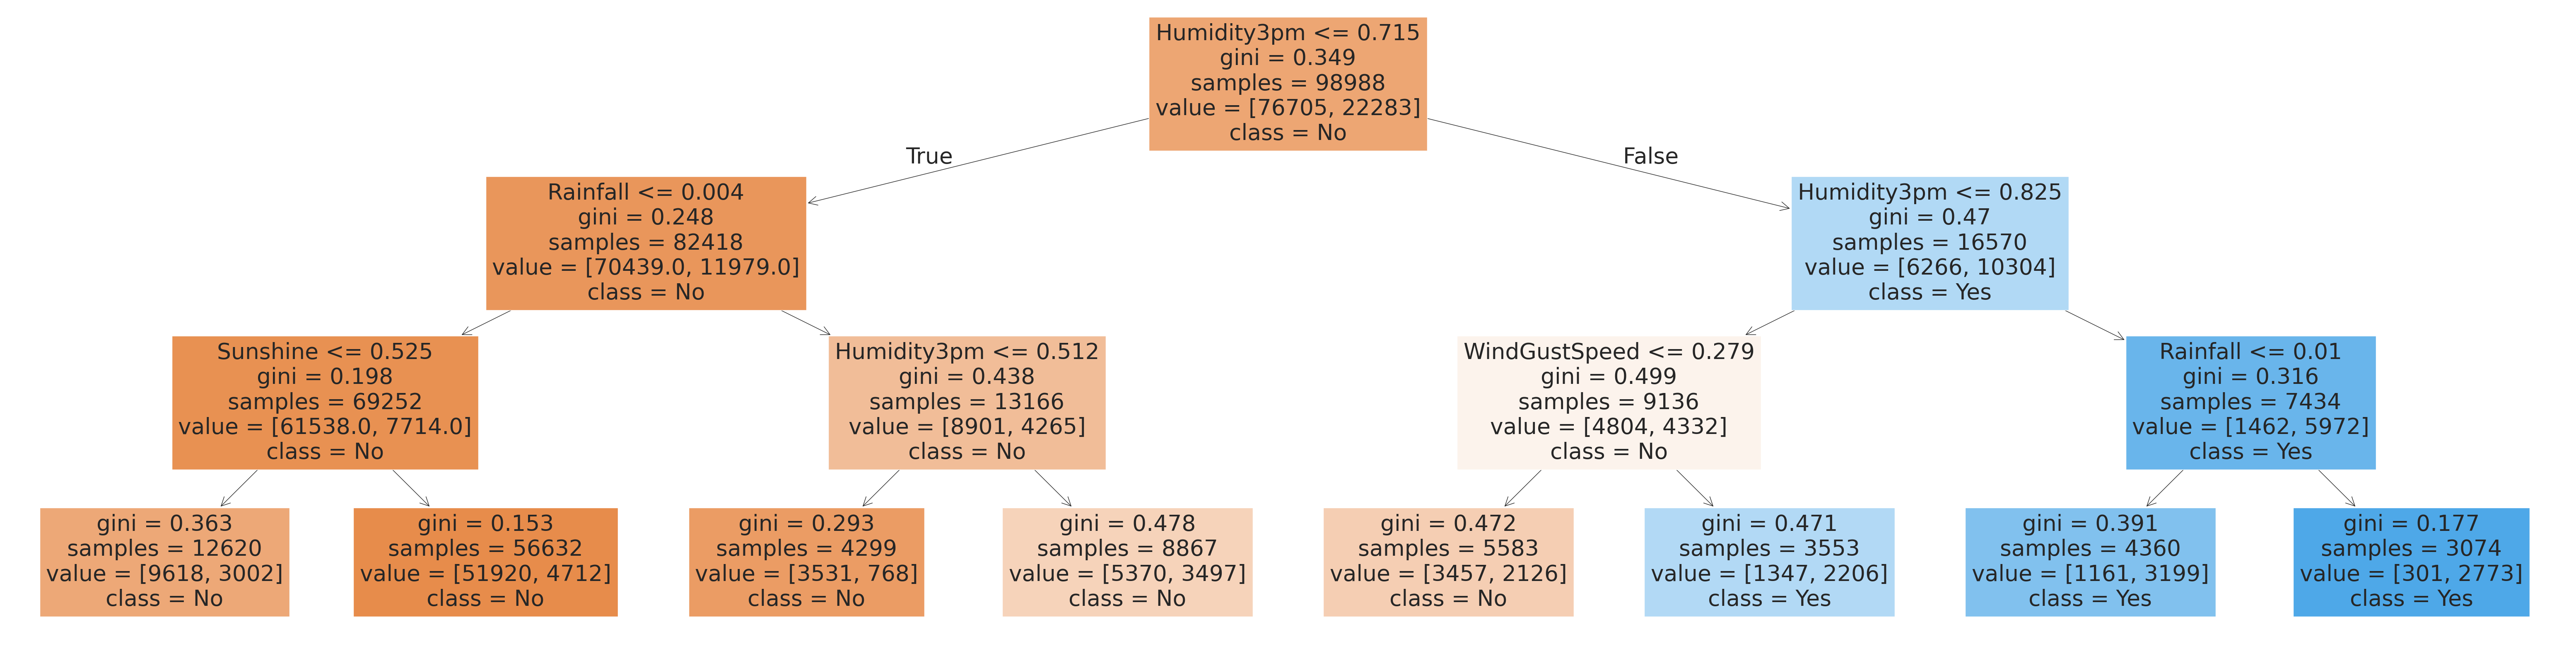

In [ ]:
plt.figure(figsize = (80, 20))
plot_tree(model, filled=True, feature_names = X_train.columns, class_names = ['No','Yes'], max_depth = 3)

In [ ]:
def max_depth_error(md):
  model = DecisionTreeClassifier(max_depth= md, random_state = 45)
  model.fit(X_train, train_targets)
  train_acc = 1-model.score(X_train, train_targets)
  val_acc = 1-model.score(X_val, val_targets)
  return {'max_depth :' : md, 'Training Error:' : train_acc, 'Validation Error:' : val_acc}

In [ ]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 22)])

In [ ]:
errors_df.sort_values('Validation Error:')

,max_depth :,Training Error:,Validation Error:
6,7,0.153312,0.154605
8,9,0.140906,0.156520
5,6,0.156271,0.157275
9,10,0.133026,0.157391
7,8,0.147806,0.157739
10,11,0.123278,0.158784
4,5,0.160676,0.159074
11,12,0.113367,0.161569
12,13,0.101831,0.163659
3,4,0.165707,0.164355


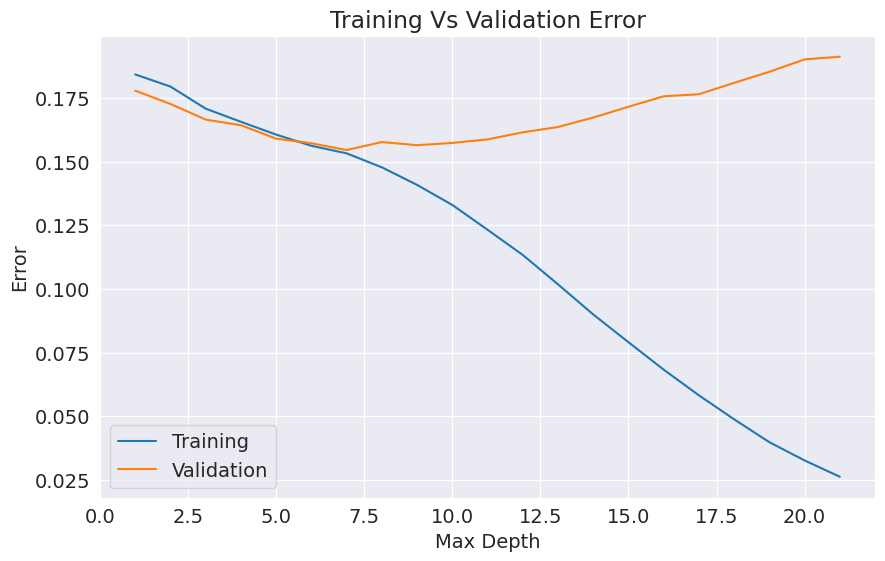

In [ ]:
plt.figure()
plt.plot(errors_df['max_depth :'], errors_df['Training Error:'])
plt.plot(errors_df['max_depth :'], errors_df['Validation Error:'])
plt.title('Training Vs Validation Error')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.legend(['Training', 'Validation'])

In [ ]:
model =DecisionTreeClassifier(max_depth = 5, random_state = 45)

In [ ]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, random_state=45)

In [ ]:
model.score(X_val, val_targets)

0.8409262375950322

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes = 128, random_state = 45)

In [ ]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=45)

In [ ]:
model.score(X_train, train_targets)

0.8480421869317493

In [ ]:
model.score(X_val, val_targets)

0.8442342290058615

In [ ]:
model.tree_.max_depth

12

In [ ]:
model_test = export_text(model, feature_names = list(X_train.columns))
print(model_test[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs =-1, random_state = 45)

In [ ]:
model.fit(X_train, train_targets)
model.score(X_train, train_targets)

0.9999797955307714

In [ ]:
model.score(X_val, val_targets)

0.8558992513493123

In [ ]:
train_probs = model.predict_proba(X_train)

In [ ]:
train_probs

array([[0.94, 0.06],
       [0.99, 0.01],
       [0.97, 0.03],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.95, 0.05]])

In [ ]:
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
# How much decision tree is estimated
len(model.estimators_)

100

In [ ]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=2100288459)

[Text(0.5, 0.875, 'Cloud3pm <= 0.722\ngini = 0.349\nsamples = 62651\nvalue = [76714, 22274]\nclass = No'),
 Text(0.25, 0.625, 'MaxTemp <= 0.466\ngini = 0.276\nsamples = 49250\nvalue = [64911, 12890]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'RainToday_Yes <= 0.5\ngini = 0.371\nsamples = 16411\nvalue = [19534, 6385]\nclass = No'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustDir_E <= 0.5\ngini = 0.219\nsamples = 32839\nvalue = [45377.0, 6505.0]\nclass = No'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Rainfall <= 0.006\ngini = 0.493\nsamples = 13401\nvalue = [11803, 9384]\nclass = No'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindDir3pm_NW <= 0.5\ngini = 0.458\nsamples = 9421\nvalue = [9586, 5271]\nclass = No'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Cloud9am <= 0.833\ngini = 0.

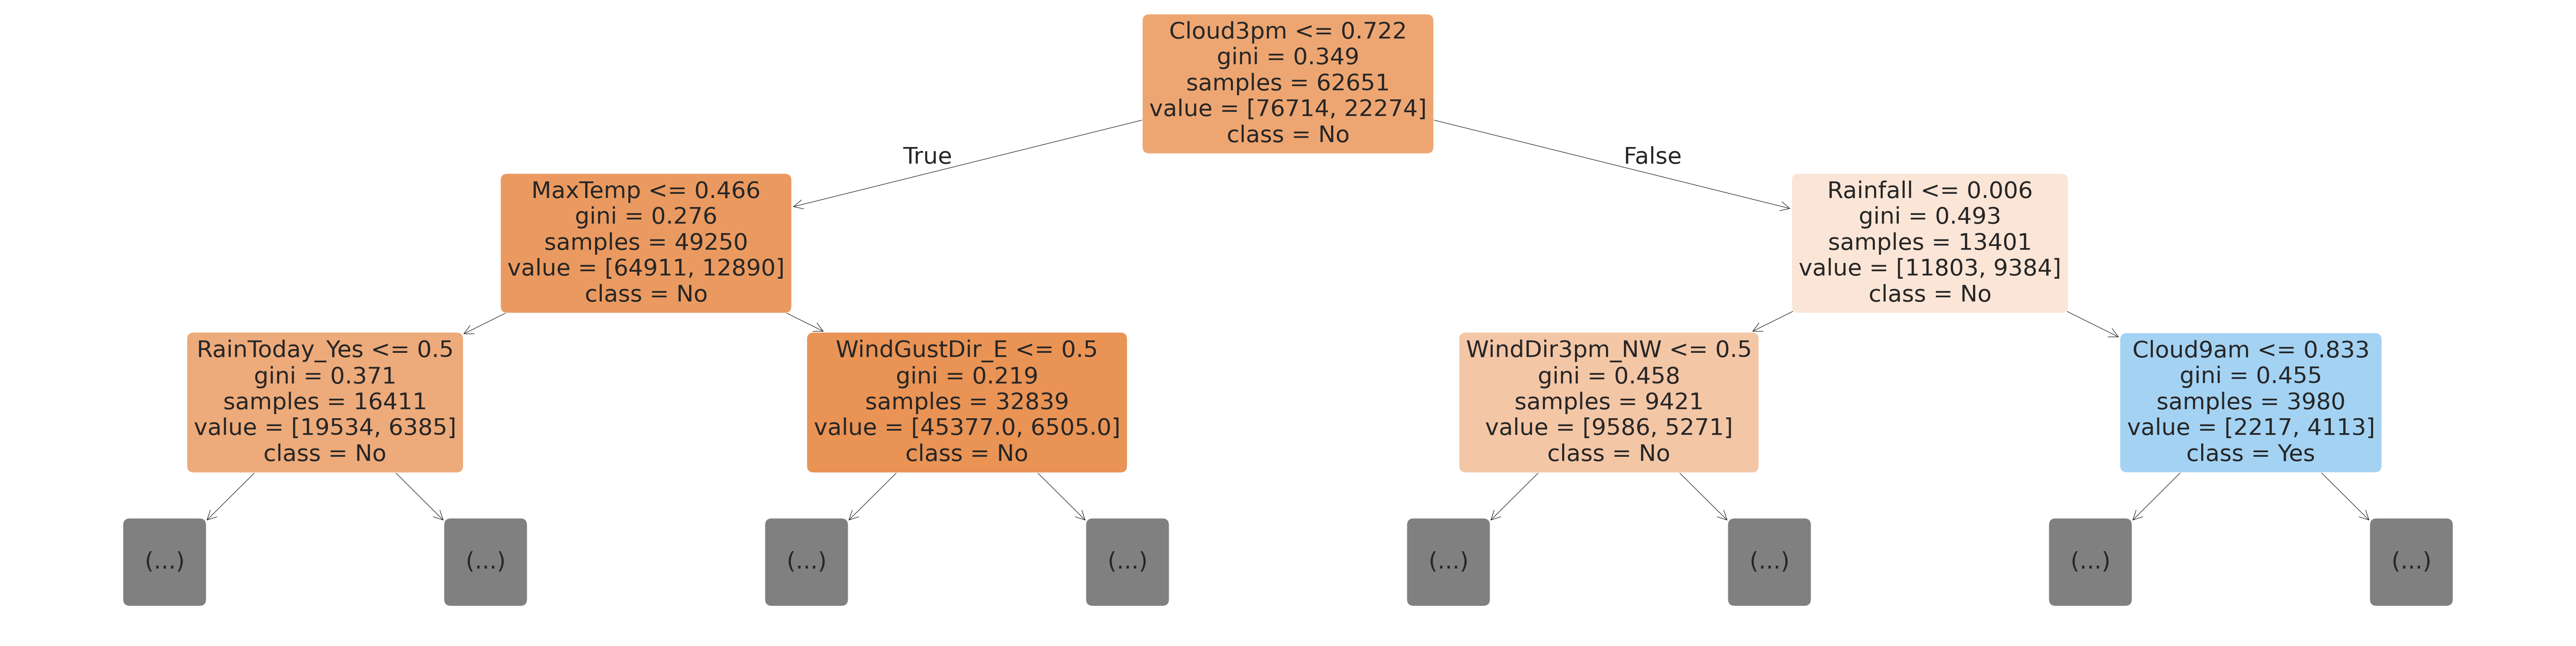

In [ ]:
plt.figure(figsize = (80, 20))
plot_tree(model.estimators_[0], max_depth = 2, feature_names = X_train.columns, class_names = ['No', 'Yes'], filled = True, rounded= True)

[Text(0.5, 0.875, 'RainToday_Yes <= 0.5\ngini = 0.35\nsamples = 62537\nvalue = [76609, 22379]\nclass = No'),
 Text(0.25, 0.625, 'Pressure3pm <= 0.505\ngini = 0.266\nsamples = 48591\nvalue = [64856, 12166]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Humidity9am <= 0.684\ngini = 0.428\nsamples = 6625\nvalue = [7251, 3259]\nclass = No'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Cloud3pm <= 0.722\ngini = 0.232\nsamples = 41966\nvalue = [57605, 8907]\nclass = No'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Pressure9am <= 0.56\ngini = 0.498\nsamples = 13946\nvalue = [11753, 10213]\nclass = No'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Cloud3pm <= 0.833\ngini = 0.491\nsamples = 5997\nvalue = [4136, 5396]\nclass = Yes'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.016\ngini = 0.47

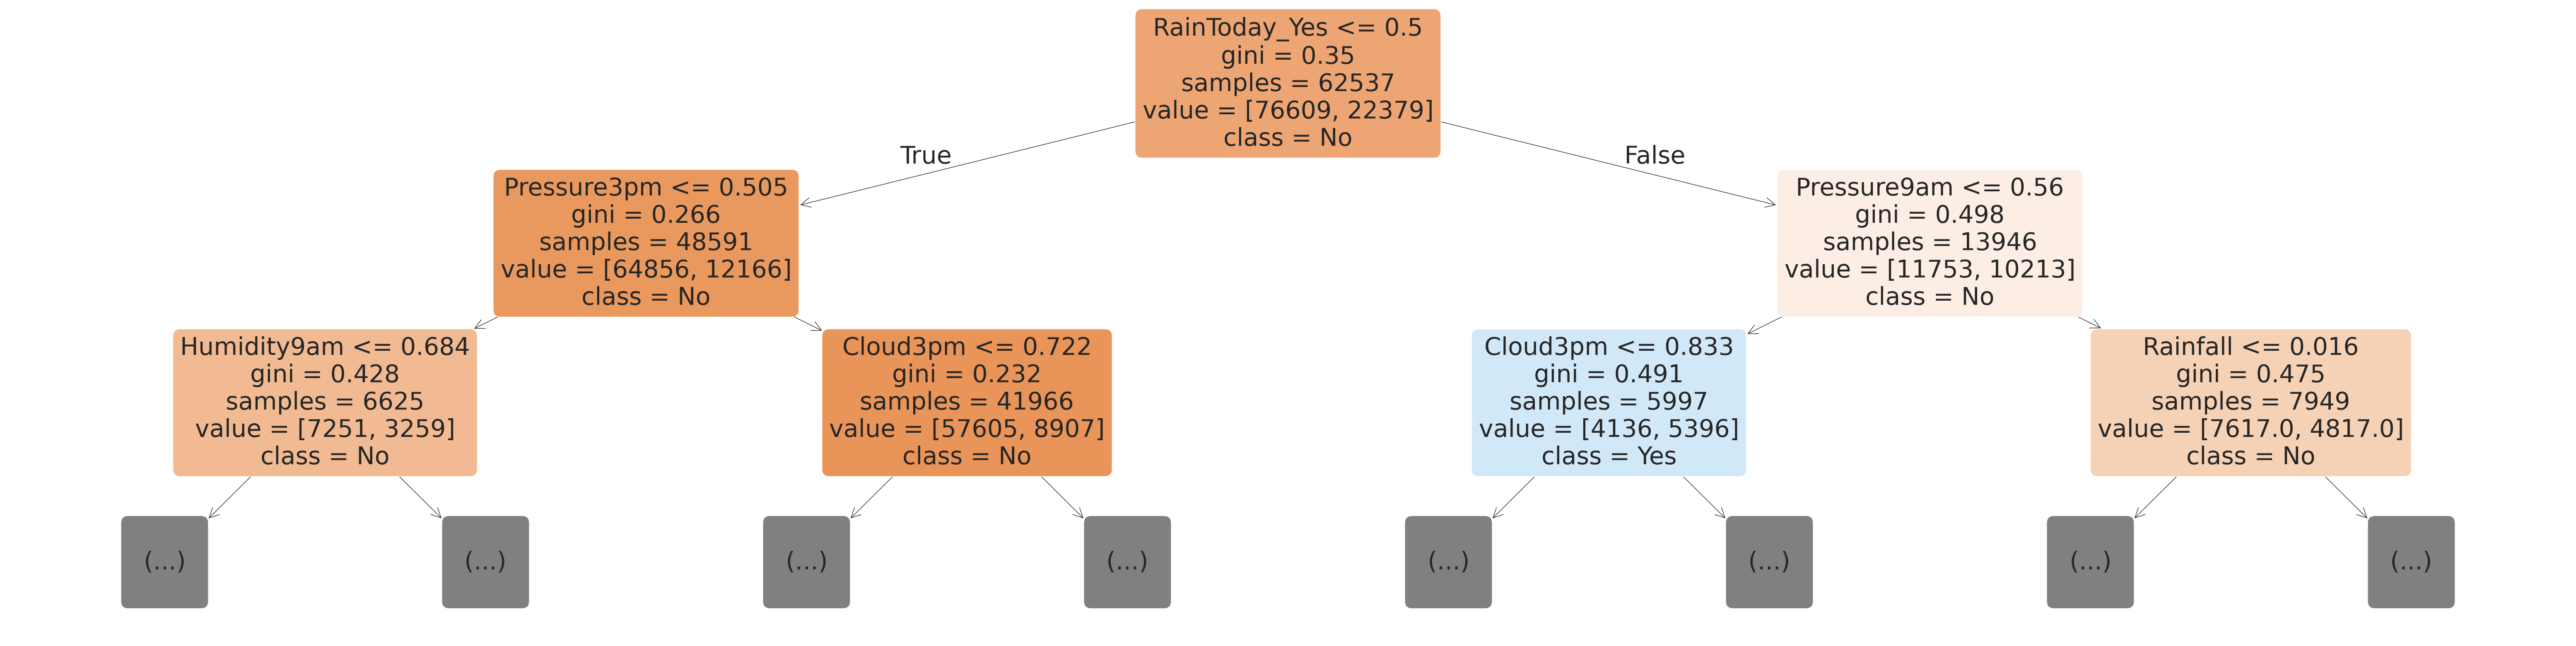

In [ ]:
plt.figure(figsize = (80, 20))
plot_tree(model.estimators_[20], max_depth = 2, feature_names = X_train.columns, class_names =['No', 'Yes'], filled = True, rounded= True)

In [ ]:
def better_tree(val):
  model = RandomForestClassifier(n_estimators = val, n_jobs = -1, random_state= 45)
  model.fit(X_train, train_targets)
  return {'Tree Number :' : val,'Tree Predicted Score: ': model.score(X_val, val_targets)}

In [ ]:
better_df = pd.DataFrame([better_tree(i) for i in range(100, 90,-1)])

In [ ]:
better_df.sort_values('Tree Predicted Score: ', ascending = False)

,Tree Number :,Tree Predicted Score:
6,94,0.856654
2,98,0.856538
5,95,0.856538
4,96,0.856422
9,91,0.856422
3,97,0.856364
1,99,0.856131
0,100,0.855899
7,93,0.855899
8,92,0.855783


In [ ]:
importance_df = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending = False)

In [ ]:
importance_df.head(10)

,Features,Importance
9,Humidity3pm,0.139925
11,Pressure3pm,0.051719
4,Sunshine,0.051423
5,WindGustSpeed,0.048234
8,Humidity9am,0.048119
2,Rainfall,0.046824
10,Pressure9am,0.046731
15,Temp3pm,0.044159
1,MaxTemp,0.042042
0,MinTemp,0.041469


<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

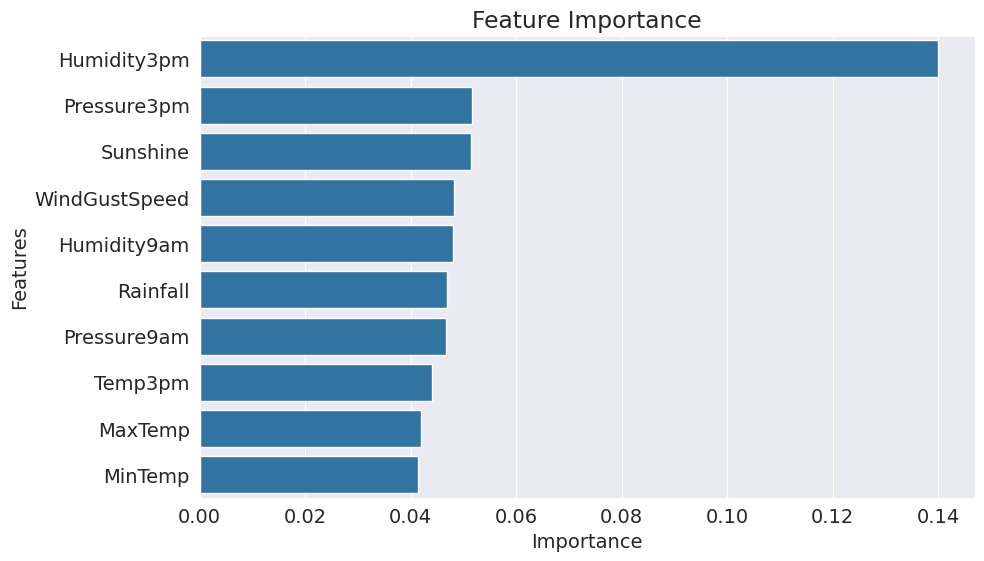

In [ ]:
plt.title('Feature Importance')
sns.barplot(x = 'Importance', y = 'Features', data = importance_df.head(10))

In [ ]:
model = RandomForestClassifier(random_state = 45, n_estimators = 500, n_jobs = -1)
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=45)

In [ ]:
model.score(X_train, train_targets)

0.9999797955307714

In [ ]:
model.score(X_val, val_targets)

0.8572920898380825

In [ ]:
def test_params(**params):
  model = RandomForestClassifier(random_state = 45, n_jobs = -1, **params)
  model.fit(X_train, train_targets)
  return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [ ]:
test_params(max_depth = 5, max_leaf_nodes = 1024, n_estimators = 1000)

(0.8209884026346628, 0.82589518890372)

In [ ]:
test_params(max_depth = 26)

(0.9815937285327514, 0.856363530845569)

In [ ]:
test_params(max_leaf_nodes = 2**5)

(0.8312320685335596, 0.8345423945215019)

In [ ]:
test_params(max_leaf_nodes = 2**20)

(0.9999797955307714, 0.8566537055307295)

In [ ]:
test_params(max_features = 'log2')

(0.9999797955307714, 0.8561894260344728)

In [ ]:
test_params(max_features = 'sqrt')

(0.9999797955307714, 0.8558992513493123)

In [ ]:
test_params(max_features = 3)

(0.9999797955307714, 0.8516627009459695)

In [ ]:
test_params(max_features = 6)

(0.9999797955307714, 0.8561894260344728)

In [ ]:
test_params(min_samples_split = 3, min_samples_leaf = 2)

(0.9619044732694872, 0.8567697754047937)

In [ ]:
test_params(min_samples_split = 100, min_samples_leaf = 60)

(0.8495272154200509, 0.8455109976205676)

In [ ]:
test_params(min_impurity_decrease = 1e-7)

(0.9995555016769709, 0.8557831814752481)

In [ ]:
test_params(min_impurity_decrease = 1e-3)

(0.7795187295429749, 0.7911322616214962)

In [ ]:
test_params(bootstrap = False)

(0.9999797955307714, 0.8577563693343393)

In [ ]:
test_params(max_samples = 0.9)

(0.9998080575423284, 0.8555510417271197)

In [ ]:
base_model = RandomForestClassifier(random_state = 45, n_jobs = -1)

base_model.fit(X_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=45)

In [ ]:
base